**Importing libraries and Loading dataset**

# New Section

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter


%matplotlib inline

In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

In [ ]:
df = pd.read_csv('/content/data-2.csv' , encoding="ISO-8859-1")

**Initial Data Analysis**

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe(include='all') # if we describe all many values are missing as can't be calculated

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [ ]:
df.describe() # first describing numeerical values only

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:

df.describe(include='object').T # here we are calculating categorical values


,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


**Data Cleaning and Transformation**

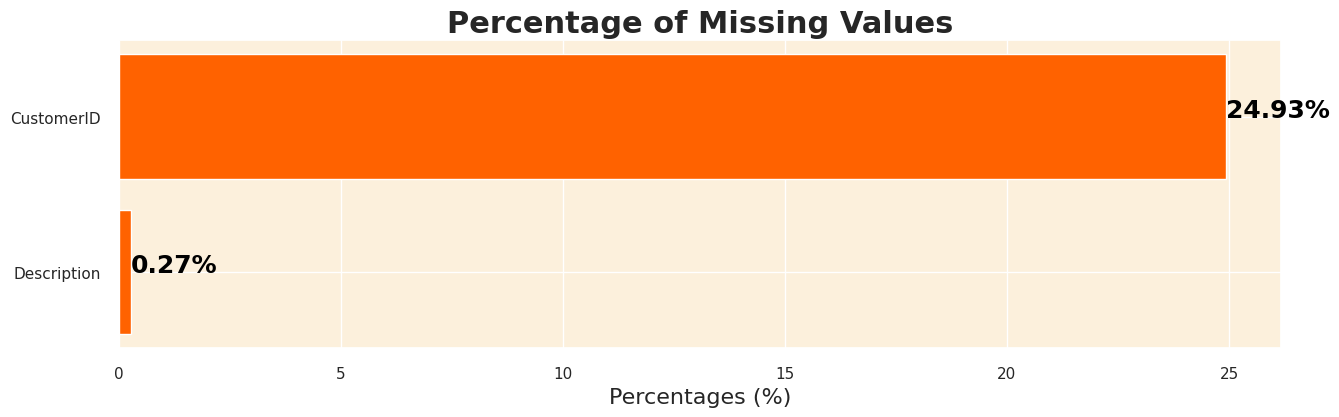

In [ ]:
missing_data = df.isnull().sum() # counting missing values
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100 # converting count to percentage

missing_percentage.sort_values(ascending=True) # arranging in ascending order

fig, ax = plt.subplots(figsize=(15, 4)) # Dimensions for graph
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200') # taking horizontal barchart with orange color

for value, name in zip(missing_percentage, missing_percentage.index): # labelling values on the graph
    ax.text(value,name , f"{value:.2f}%", fontweight='bold', fontsize=18, color='black')



plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)   # Giving title, label and displaying the graph
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

Handling NULL values


In [ ]:
df[df['CustomerID'].isnull() | df['Description'].isnull()] # finding null values in customerid and description


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
df = df.dropna(subset=['CustomerID', 'Description']) #dropping null values

In [ ]:
df.isnull().sum().sum() #rechecking for null values

np.int64(0)

Handling Duplicate entries

In [ ]:
duplicated_rows= df[df.duplicated(keep=False)] # Getting rows with duplicate entries
duplicated_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
duplicated_rows_sorted= duplicated_rows.sort_values(by=['InvoiceNo','StockCode','Description','Quantity','CustomerID']) # sorting duplicate values

duplicated_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [ ]:
df.duplicated().sum() # counting no of duplicated values

np.int64(5225)

In [ ]:
df.drop_duplicates(inplace=True) #dropping duplicate values

In [ ]:
df.duplicated().sum() #rechecking on duplicate values

np.int64(0)

In [ ]:

df.shape[0] # calculating no of rows

401604

Handling Cancelled Transactions

In [ ]:
df['Transaction_Status'] = np.where ( df['InvoiceNo'].astype(str).str.startswith('C') ,'Cancelled','Completed') # finding cancelled and completed transactions

cancelled_Transactions=df[df['Transaction_Status']== 'Cancelled'] # separating cancelled transactions
cancelled_Transactions.describe().drop('CustomerID', axis=1) # descrining cancelled transactions and dropping customerid as it is an identifier and not a numeric value

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [ ]:
cancelled_percentage = (cancelled_Transactions.shape[0] / df.shape[0]) * 100 #Calculating precentage of cancelled transactions
cancelled_percentage

2.209141343213713

Handling unique Stockcode

In [ ]:
unique_StockCodes= df['StockCode'].nunique() #finding unique stock codes
unique_StockCodes

3684

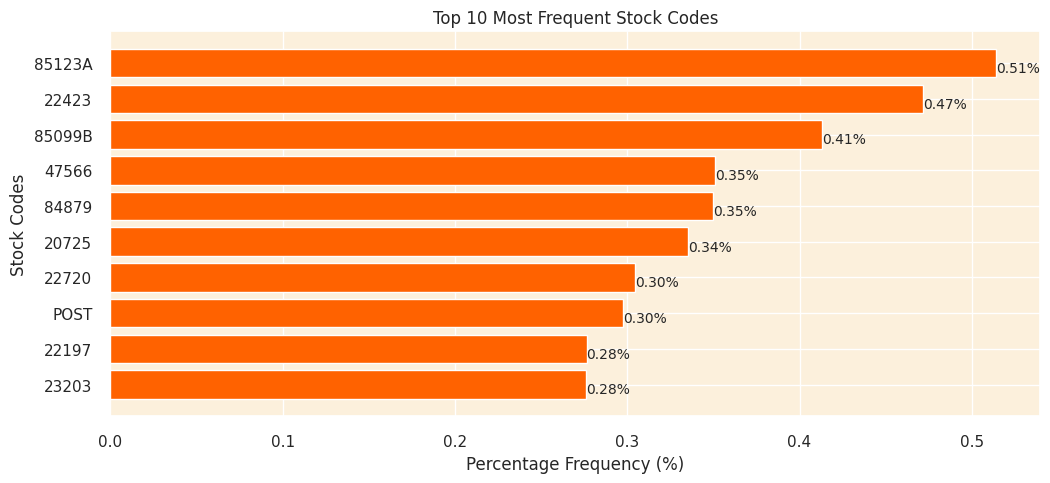

In [ ]:
top_10_stockCodes= df['StockCode'].value_counts(normalize=True).head(10) *100 #finding top 10 stockcodes

plt.figure(figsize=(12, 5)) #graph

plt.barh(top_10_stockCodes.index, top_10_stockCodes, color='#ff6200')

for i, val in enumerate(top_10_stockCodes):
    plt.text(val, i + 0.25, f'{val:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [ ]:

unique_StockCodes = df['StockCode'].unique() #numeric char coint in stockcode

numeric_char_count_in_unique_StockCodes = pd.Series (unique_StockCodes).apply(lambda x : sum( c.isdigit() for c in str(x))).value_counts()

numeric_char_count_in_unique_StockCodes

,count
5,3676
0,7
1,1


In [ ]:
anomalous_stock_codes = [code for code in unique_StockCodes if sum (c.isdigit() for c in str(code)) in (0,1)]

anomalous_stock_codes

for code in anomalous_stock_codes:
  print(code)

POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [ ]:
percentage_anomalous = (df ['StockCode'].isin(anomalous_stock_codes).sum()/ len(df)) *100

percentage_anomalous

np.float64(0.4768378801007958)

In [ ]:
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [ ]:
df.shape[0]

399689

Handling descriptions

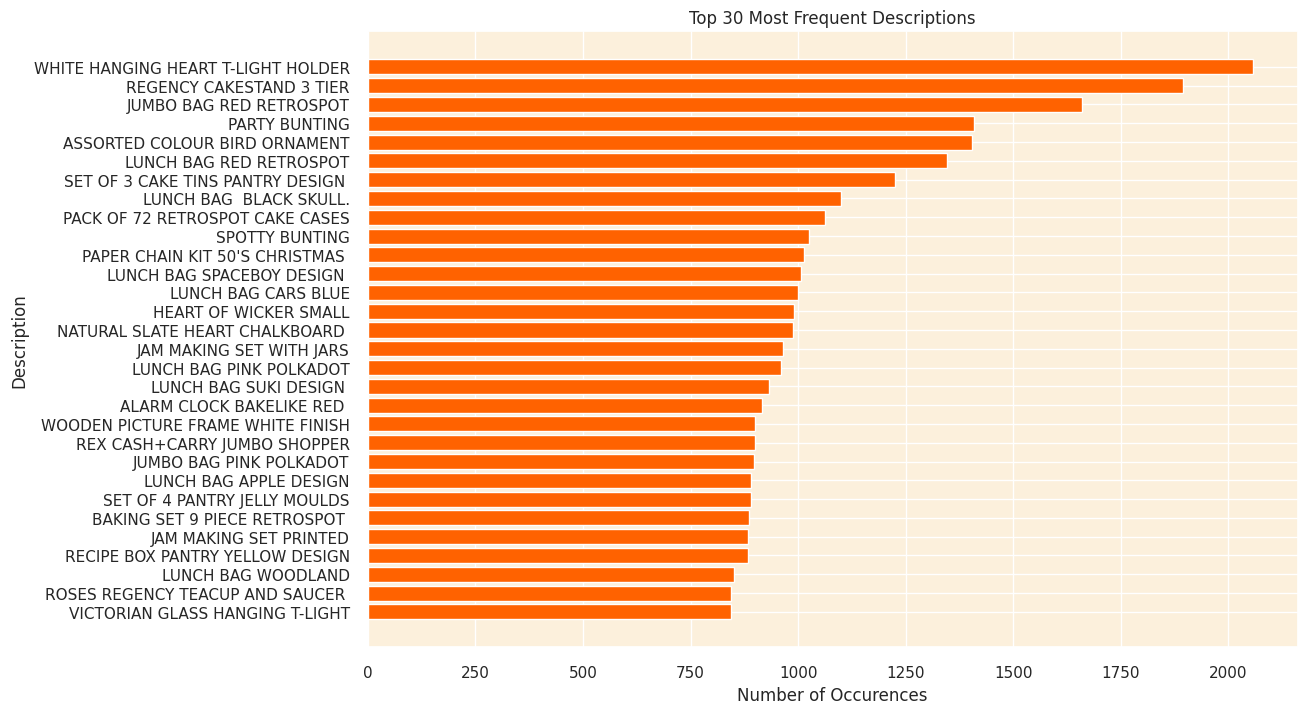

In [ ]:
description_counts = df['Description'].value_counts() # finding and plotting 30 most frequent descriptions

top_30_descriptions = description_counts[:30]

plt.figure(figsize = (12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')


plt.xlabel('Number of Occurences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')
plt.show()

In [ ]:
lowercase_descriptions = df['Description'].unique() # finding descriptions with lowercase letters
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]
for desc in lowercase_descriptions:
    print(desc)

BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [ ]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"] # finding percentage of service related percentage

service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

service_related_percentage

0.02076614567826485

In [ ]:
df = df[~df['Description'].isin(service_related_descriptions)] # Converting all descriptions to uppercase

df['Description'] = df['Description'].str.upper()

In [ ]:
df.shape[0]

399606

In [ ]:
df['UnitPrice'].describe()

,UnitPrice
count,399606.000000
mean,2.904957
std,4.448796
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,649.500000


In [ ]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


In [ ]:
df = df[df['UnitPrice'] > 0]

In [ ]:
print(df[df['UnitPrice']<0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Transaction_Status]
Index: []


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(399573, 9)

**Feature Engineering**

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['InvoiceDay'] = df['InvoiceDate'].dt.date

customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

most_recent_date = df['InvoiceDay'].max()

customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [ ]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196


In [ ]:
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

customer_data.head().T

,0,1,2,3,4
CustomerID,12346.0,12347.000000,12348.00,12349.00,12350.0
Days_Since_Last_Purchase,325.0,2.000000,75.00,18.00,310.0
Total_Transactions,2.0,7.000000,4.00,1.00,1.0
Total_Products_Purchased,0.0,2458.000000,2332.00,630.00,196.0
Total_Spend,0.0,4310.000000,1437.24,1457.55,294.4
Average_Transaction_Value,0.0,615.714286,359.31,1457.55,294.4


In [ ]:
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

customer_data.head().T

,0,1,2,3,4
CustomerID,12346.0,12347.000000,12348.00,12349.00,12350.0
Days_Since_Last_Purchase,325.0,2.000000,75.00,18.00,310.0
Total_Transactions,2.0,7.000000,4.00,1.00,1.0
Total_Products_Purchased,0.0,2458.000000,2332.00,630.00,196.0
Total_Spend,0.0,4310.000000,1437.24,1457.55,294.4
Average_Transaction_Value,0.0,615.714286,359.31,1457.55,294.4
Unique_Products_Purchased,1.0,103.000000,21.00,72.00,16.0


In [ ]:
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

customer_data.head().T

,0,1,2,3,4
CustomerID,12346.0,12347.000000,12348.000000,12349.00,12350.0
Days_Since_Last_Purchase,325.0,2.000000,75.000000,18.00,310.0
Total_Transactions,2.0,7.000000,4.000000,1.00,1.0
Total_Products_Purchased,0.0,2458.000000,2332.000000,630.00,196.0
Total_Spend,0.0,4310.000000,1437.240000,1457.55,294.4
Average_Transaction_Value,0.0,615.714286,359.310000,1457.55,294.4
Unique_Products_Purchased,1.0,103.000000,21.000000,72.00,16.0
Average_Days_Between_Purchases,0.0,2.016575,10.884615,0.00,0.0
Day_Of_Week,1.0,1.000000,3.000000,0.00,2.0
Hour,10.0,14.000000,19.000000,9.00,16.0


In [ ]:
df['Country'].value_counts(normalize=True).head()

,proportion
Country,
United Kingdom,0.890971
Germany,0.022722
France,0.020402
EIRE,0.018440
Spain,0.006162


In [ ]:
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

customer_data.head().T

,0,1,2,3,4
CustomerID,12346.0,12347.000000,12348.000000,12349.00,12350.0
Days_Since_Last_Purchase,325.0,2.000000,75.000000,18.00,310.0
Total_Transactions,2.0,7.000000,4.000000,1.00,1.0
Total_Products_Purchased,0.0,2458.000000,2332.000000,630.00,196.0
Total_Spend,0.0,4310.000000,1437.240000,1457.55,294.4
Average_Transaction_Value,0.0,615.714286,359.310000,1457.55,294.4
Unique_Products_Purchased,1.0,103.000000,21.000000,72.00,16.0
Average_Days_Between_Purchases,0.0,2.016575,10.884615,0.00,0.0
Day_Of_Week,1.0,1.000000,3.000000,0.00,2.0
Hour,10.0,14.000000,19.000000,9.00,16.0


In [ ]:
customer_data['Is_UK'].value_counts()

,count
Is_UK,
1,3866
0,416


In [ ]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left', suffixes=('', '_y'))

customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

customer_data.head().T

,0,1,2,3,4
CustomerID,12346.0,12347.000000,12348.000000,12349.00,12350.0
Days_Since_Last_Purchase,325.0,2.000000,75.000000,18.00,310.0
Total_Transactions,2.0,7.000000,4.000000,1.00,1.0
Total_Products_Purchased,0.0,2458.000000,2332.000000,630.00,196.0
Total_Spend,0.0,4310.000000,1437.240000,1457.55,294.4
Average_Transaction_Value,0.0,615.714286,359.310000,1457.55,294.4
Unique_Products_Purchased,1.0,103.000000,21.000000,72.00,16.0
Average_Days_Between_Purchases,0.0,2.016575,10.884615,0.00,0.0
Day_Of_Week,1.0,1.000000,3.000000,0.00,2.0
Hour,10.0,14.000000,19.000000,9.00,16.0


In [ ]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

def calculate_trend(spend_data):
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    else:
        return 0

spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

customer_data.head().T

,0,1,2,3,4
CustomerID,12346.0,12347.000000,12348.000000,12349.00,12350.0
Days_Since_Last_Purchase,325.0,2.000000,75.000000,18.00,310.0
Total_Transactions,2.0,7.000000,4.000000,1.00,1.0
Total_Products_Purchased,0.0,2458.000000,2332.000000,630.00,196.0
Total_Spend,0.0,4310.000000,1437.240000,1457.55,294.4
Average_Transaction_Value,0.0,615.714286,359.310000,1457.55,294.4
Unique_Products_Purchased,1.0,103.000000,21.000000,72.00,16.0
Average_Days_Between_Purchases,0.0,2.016575,10.884615,0.00,0.0
Day_Of_Week,1.0,1.000000,3.000000,0.00,2.0
Hour,10.0,14.000000,19.000000,9.00,16.0


In [ ]:
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

customer_data = customer_data.convert_dtypes()

In [ ]:
customer_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0
Days_Since_Last_Purchase,325,2,75,18,310,36,204,232,214,22
Total_Transactions,2,7,4,1,1,8,1,1,1,3
Total_Products_Purchased,0,2458,2332,630,196,463,20,530,240,1573
Total_Spend,0.0,4310.0,1437.24,1457.55,294.4,1265.41,89.0,1079.4,459.4,2487.43
Average_Transaction_Value,0.0,615.714286,359.31,1457.55,294.4,158.17625,89.0,1079.4,459.4,829.143333
Unique_Products_Purchased,1,103,21,72,16,57,4,58,13,52
Average_Days_Between_Purchases,0.0,2.016575,10.884615,0.0,0.0,3.13253,0.0,0.0,0.0,5.315789
Day_Of_Week,1,1,3,0,2,1,3,3,0,1
Hour,10,14,19,9,16,14,17,13,13,9


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Days_Since_Last_Purchase        4282 non-null   Int64  
 2   Total_Transactions              4282 non-null   Int64  
 3   Total_Products_Purchased        4282 non-null   Int64  
 4   Total_Spend                     4282 non-null   Float64
 5   Average_Transaction_Value       4282 non-null   Float64
 6   Unique_Products_Purchased       4282 non-null   Int64  
 7   Average_Days_Between_Purchases  4282 non-null   Float64
 8   Day_Of_Week                     4282 non-null   Int32  
 9   Hour                            4282 non-null   Int32  
 10  Is_UK                           4282 non-null   Int64  
 11  Cancellation_Frequency          4282 non-null   Int64  
 12  Cancellation_Rate               42

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

for col in ['Days_Since_Last_Purchase', 'Average_Days_Between_Purchases']:
    customer_data[col] = pd.to_numeric(customer_data[col], errors='coerce')

customer_data.fillna(0, inplace=True)

model = IsolationForest(contamination=0.05, random_state=0)

customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

customer_data.head().T

,0,1,2,3,4
CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0
Days_Since_Last_Purchase,325,2,75,18,310
Total_Transactions,2,7,4,1,1
Total_Products_Purchased,0,2458,2332,630,196
Total_Spend,0.0,4310.0,1437.24,1457.55,294.4
Average_Transaction_Value,0.0,615.714286,359.31,1457.55,294.4
Unique_Products_Purchased,1,103,21,72,16
Average_Days_Between_Purchases,0.0,2.016575,10.884615,0.0,0.0
Day_Of_Week,1,1,3,0,2
Hour,10,14,19,9,16


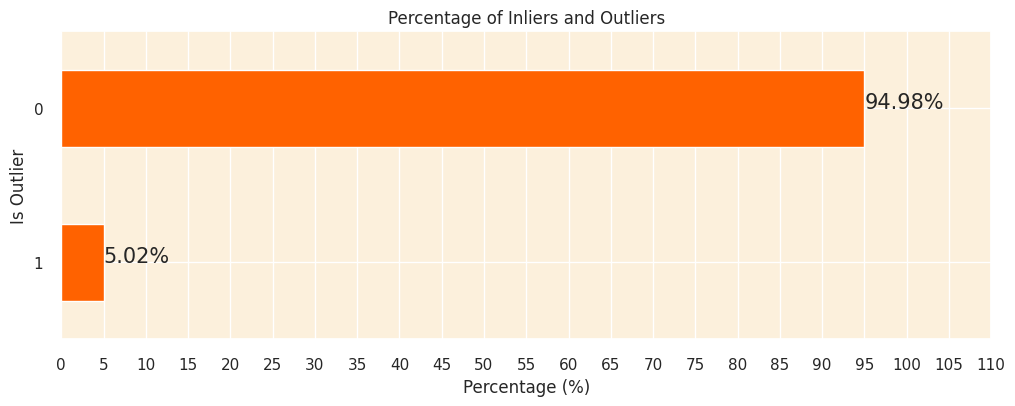

In [ ]:

outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

customer_data_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
customer_data_cleaned.shape[0]

4067

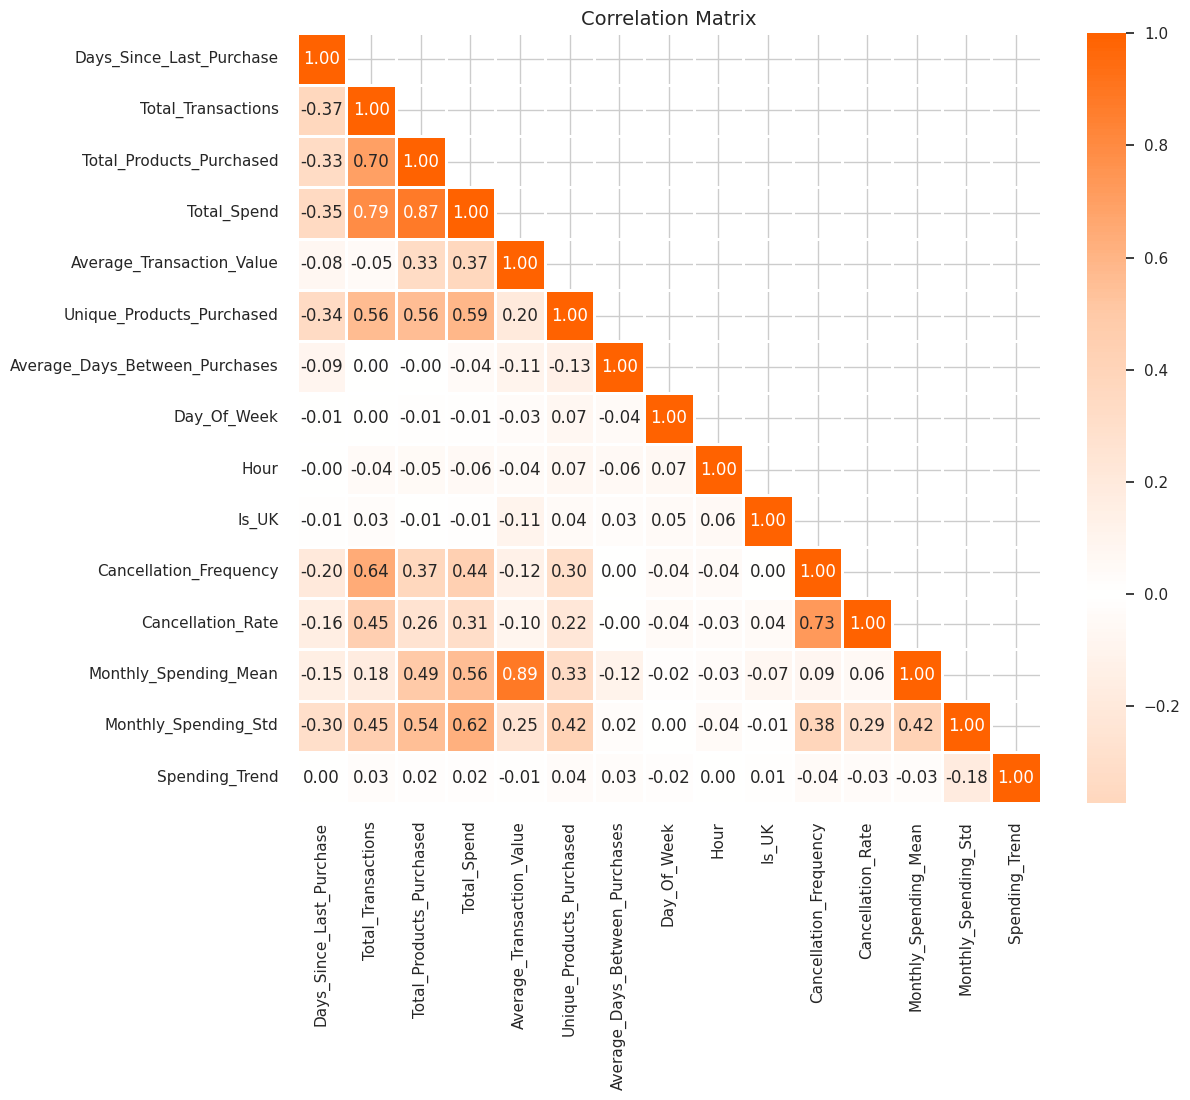

In [ ]:
sns.set_style('whitegrid')

corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

**Data Processing**

In [ ]:
scaler = StandardScaler()

columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

customer_data_scaled = customer_data_cleaned.copy()

customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

customer_data_scaled.head().T

,0,1,2,3,4
CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0
Days_Since_Last_Purchase,2.345802,-0.905575,-0.170744,-0.744516,2.194809
Total_Transactions,-0.477589,0.70793,-0.003381,-0.714692,-0.714692
Total_Products_Purchased,-0.754491,2.005048,1.863591,-0.047205,-0.534446
Total_Spend,-0.813464,2.36692,0.247087,0.262074,-0.596223
Average_Transaction_Value,-1.317106,1.528132,0.343279,5.418285,0.043327
Unique_Products_Purchased,-0.908471,0.815119,-0.570512,0.291283,-0.655002
Average_Days_Between_Purchases,-0.310564,-0.128438,0.672476,-0.310564,-0.310564
Day_Of_Week,1,1,3,0,2
Hour,-1.086929,0.647126,2.814696,-1.520443,1.514154


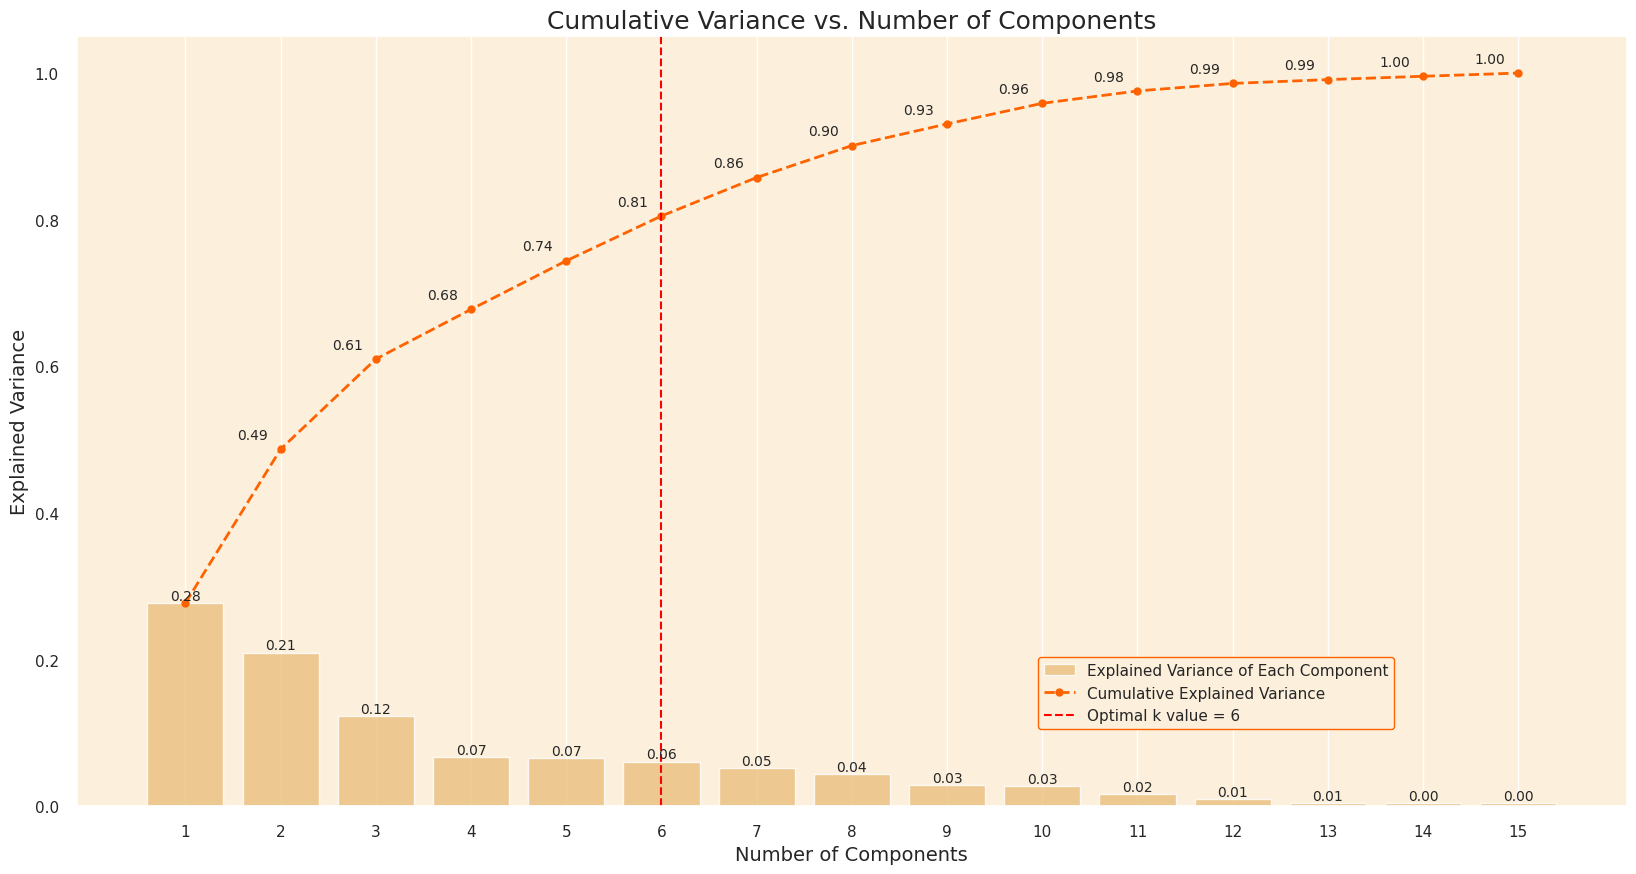

In [ ]:
customer_data_scaled.set_index('CustomerID', inplace=True)

pca = PCA().fit(customer_data_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

optimal_k = 6

sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

plt.figure(figsize=(20, 10))

barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()


In [ ]:
pca = PCA(n_components=6)

customer_data_pca = pca.fit_transform(customer_data_scaled)

customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

customer_data_pca.index = customer_data_scaled.index

In [ ]:
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.186469,-1.705370,-1.576745,-1.008187,-0.411803,-1.658012
12347.0,3.290264,-1.387375,1.923310,0.930990,-0.010591,0.873150
12348.0,0.584684,0.585019,0.664727,0.655411,-0.470280,2.306657
12349.0,1.791116,-2.695652,5.850040,-0.853418,0.677111,-1.520098
12350.0,-1.997139,-0.542639,0.578781,-0.183682,-1.484838,0.062672


In [ ]:
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #57574f' if i in top3 else '' for i in column.index]
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)])
                    # index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.217859,-0.013986,0.067660,-0.273430,-0.240968,-0.373059
1,0.380301,0.014759,-0.259180,0.138165,-0.017356,-0.028257
2,0.401425,0.007365,0.069133,0.134806,0.057476,-0.013373
3,0.431260,0.010159,0.065165,0.092047,0.025202,-0.036947
4,0.176225,-0.015544,0.589050,-0.114307,0.021847,-0.101738
5,0.324992,0.063346,0.014010,0.230502,-0.193981,0.124604
6,-0.022600,-0.036007,-0.127341,0.160627,0.753462,0.211787
7,-0.026572,0.994650,-0.006591,-0.028870,0.058359,-0.060799
8,-0.024259,0.056388,-0.002019,0.226832,-0.528881,0.621915
9,-0.001014,0.007435,-0.018378,0.013419,-0.005353,0.014384


**K-Means Clustering**

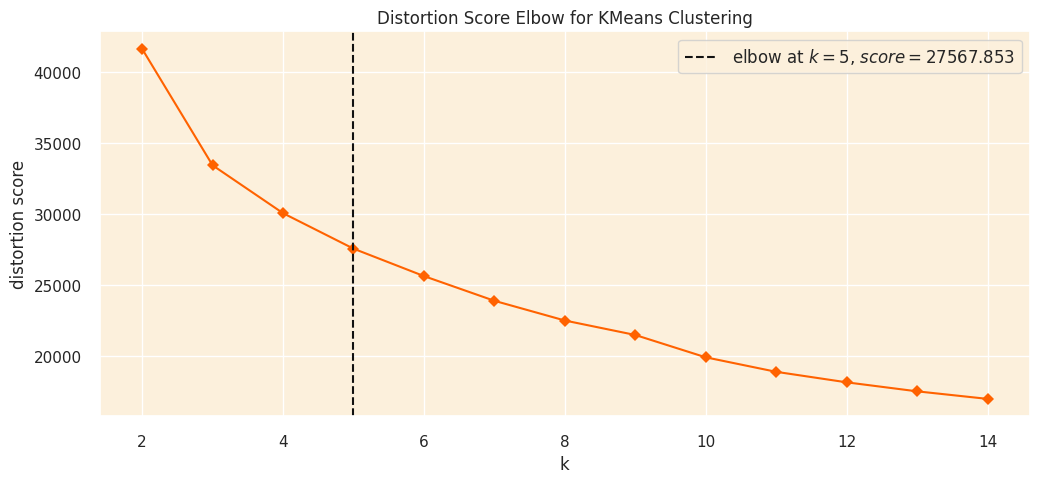

In [ ]:
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'}) #setting background color and grid color

sns.set_palette(['#ff6200']) #orange color for plots

km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

fig, ax = plt.subplots(figsize=(12, 5))

visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

visualizer.fit(customer_data_pca)

visualizer.show();

In [ ]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    plt.figure(figsize=figsize)

    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)#creates grid layout for visuliazation

    first_plot = plt.subplot(grid[0, :])

    sns.set_palette(['darkorange'])

    silhouette_scores = []

    for k in range(start_k, stop_k + 1): #for calculating silhouette score
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))#finding the best K

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')#plotting silhouette scores
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'#giving the best value of k like actually displaying it
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))

    colors = sns.color_palette("bright")#setting bright color palatte

    for i in range(start_k, stop_k + 1):#cluster wise silhouette plotting
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)#using silhouette visualizer from yellowbrick
        visualizer.fit(df)

        score = silhouette_score(df, km.labels_)# adding score to each plot
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

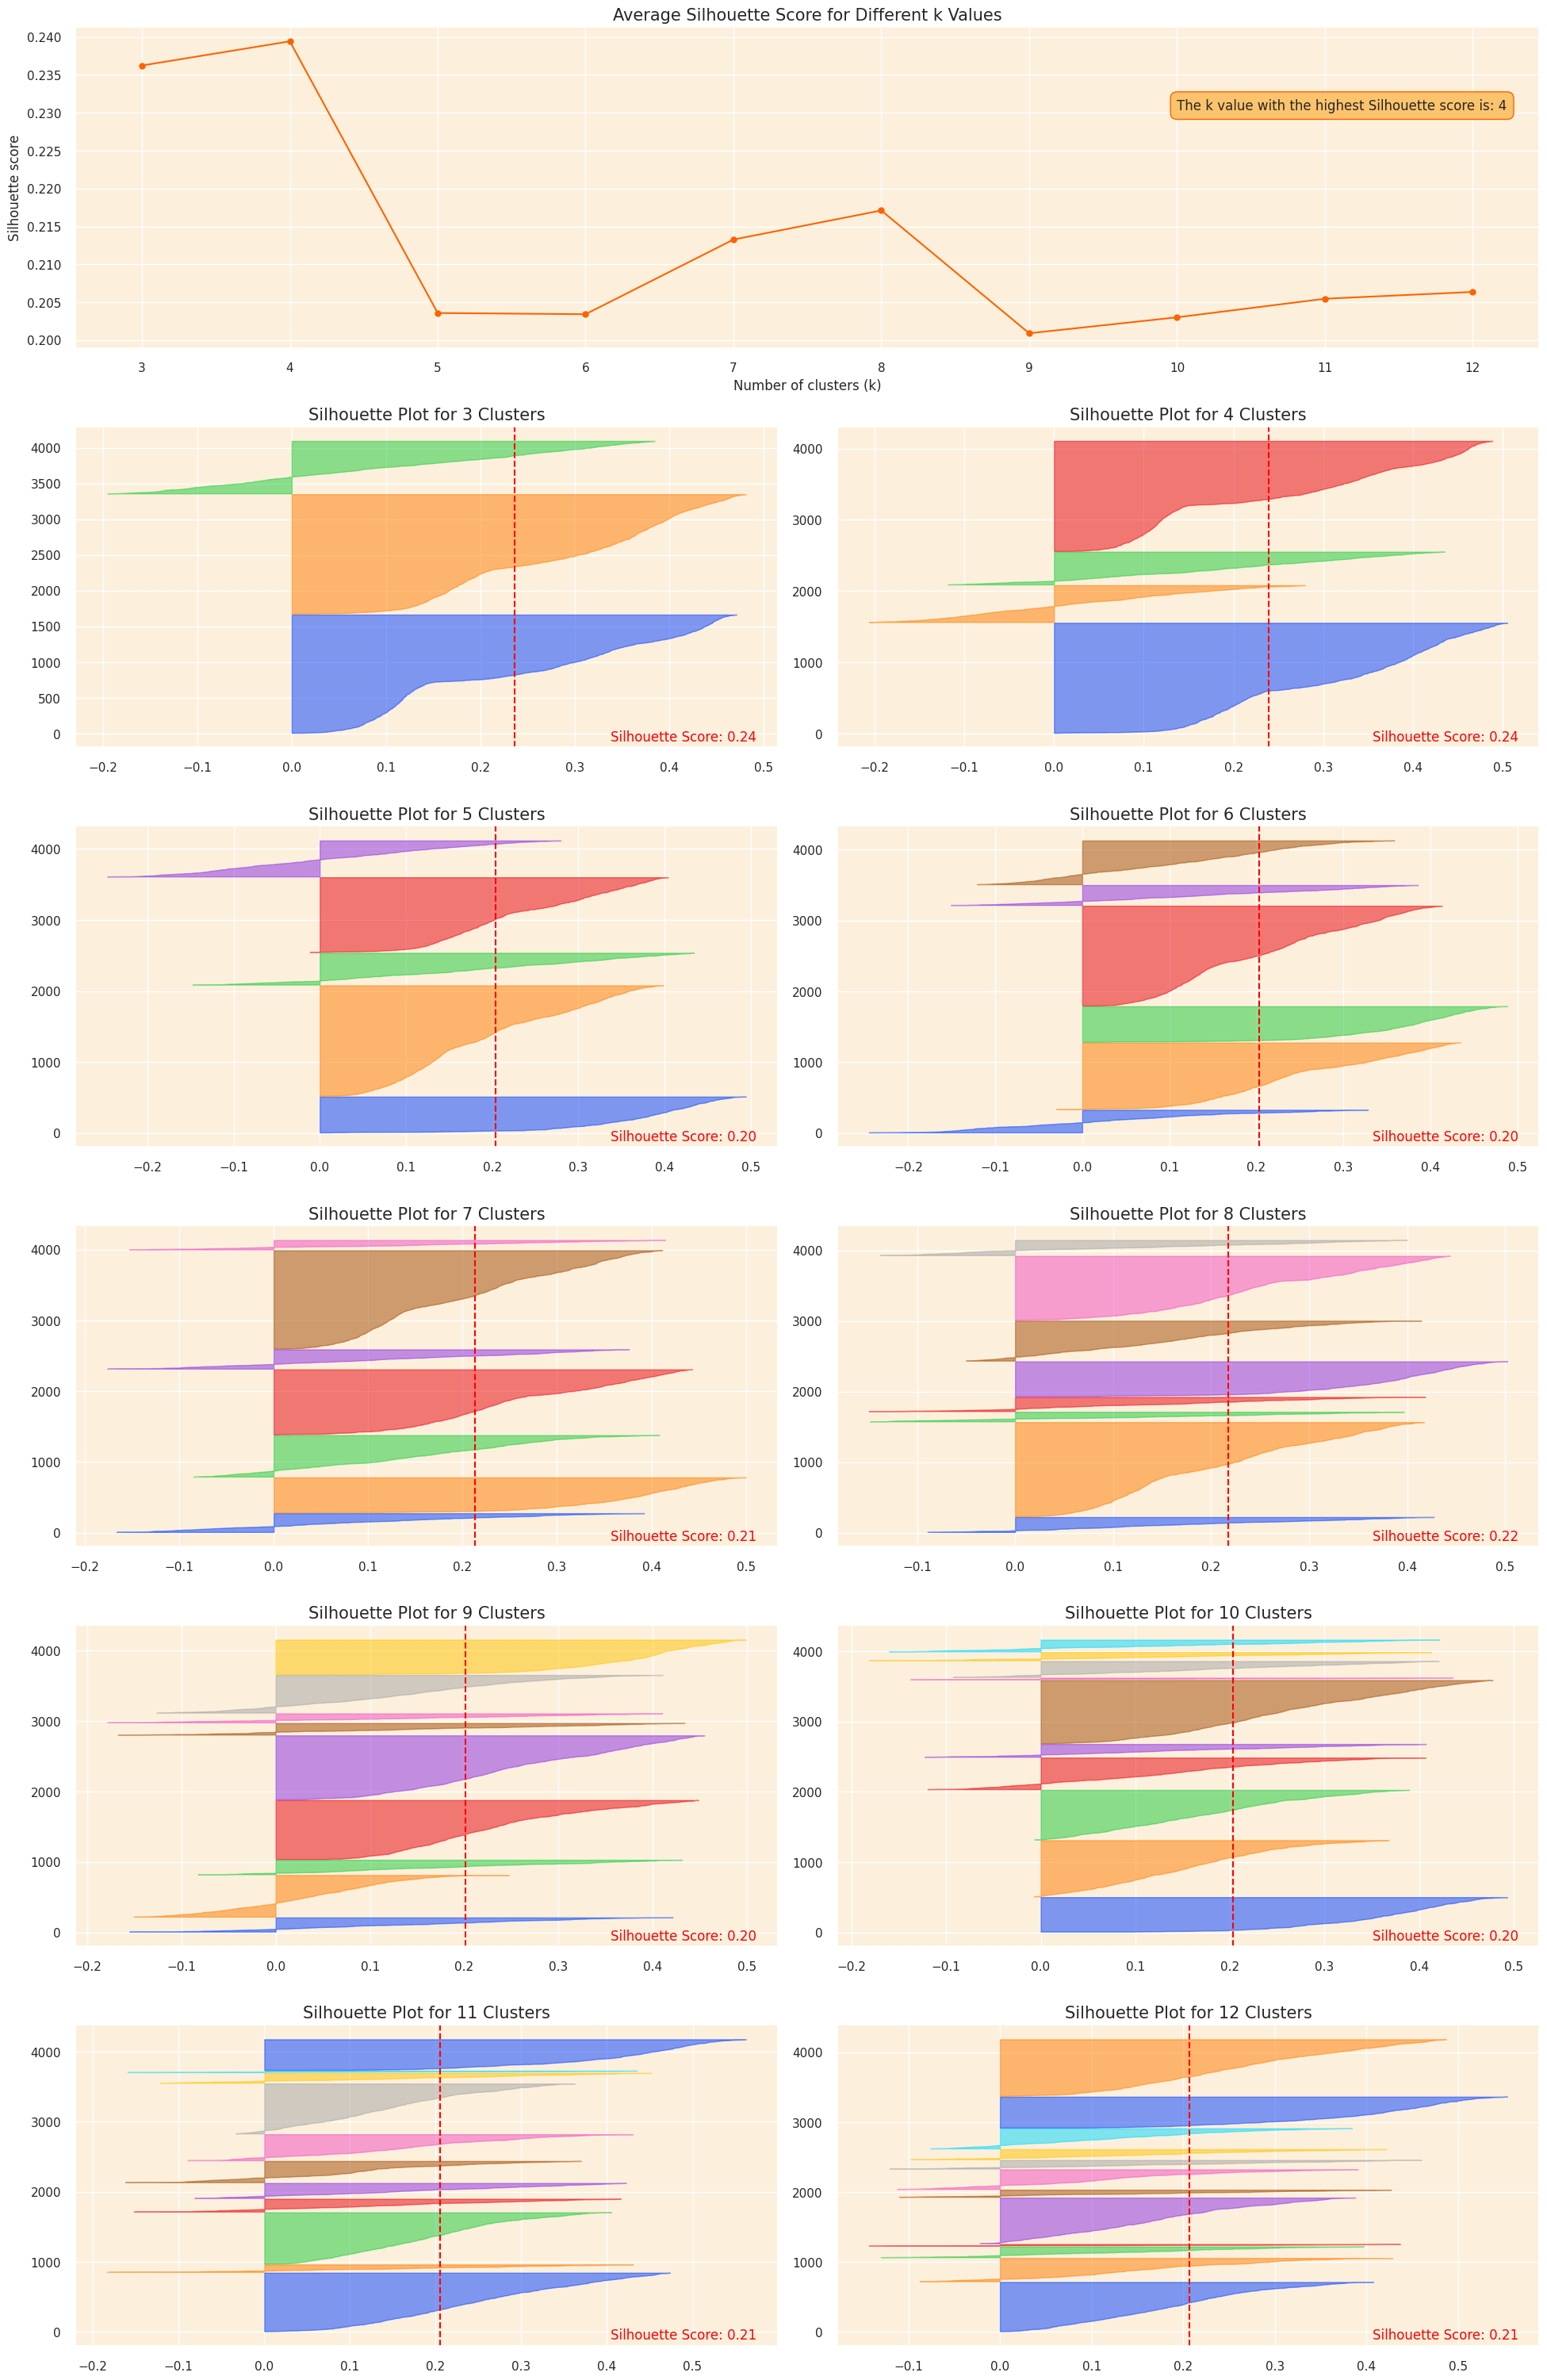

In [ ]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))#calling the function

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)# applying k-means clustering
kmeans.fit(customer_data_pca)

cluster_frequencies = Counter(kmeans.labels_) #gives cluster no of each customer

label_mapping = {label: new_label for new_label, (label, _) in enumerate(cluster_frequencies.most_common())} # relabelling clusters

label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}#remapping clusters

new_labels = np.array([label_mapping[label] for label in kmeans.labels_])# assigning the new labels

customer_data_cleaned['cluster'] = new_labels#adding clusters to cleaned dataset

#naming for downloaded cleaned and clustered csv
cluster_map = {
    0: 'High Value Customers',
    1: 'Medium Value Customers',
    2: 'Low Value Customers'
}
customer_data_cleaned['Segment'] = customer_data_cleaned['cluster'].map(cluster_map)

customer_data_cleaned.to_csv('ecommerce_clustered.csv', index=False)

# downloading clean and clustered dataset
from google.colab import files
files.download('ecommerce_clustered.csv')


customer_data_pca['cluster'] = new_labels#saving labels in PCA data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
customer_data_cleaned.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster,Segment
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,2,Low Value Customers
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,0,High Value Customers
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,Medium Value Customers
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,2,Low Value Customers
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,2,Low Value Customers


**Clustering Evaluation**

In [ ]:
colors = ['#e8000b', '#1ac938', '#023eff']

In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'

cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]#creating dataframes to hold customer from that particular cluster
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

colors = ['red', 'blue', 'green']
fig = go.Figure()#creating a 3D figure

fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],# plotting the 3D PCA-transformed points for that cluster.
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

fig.update_layout(                                                               #updating features for 3D figure
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

fig.show()

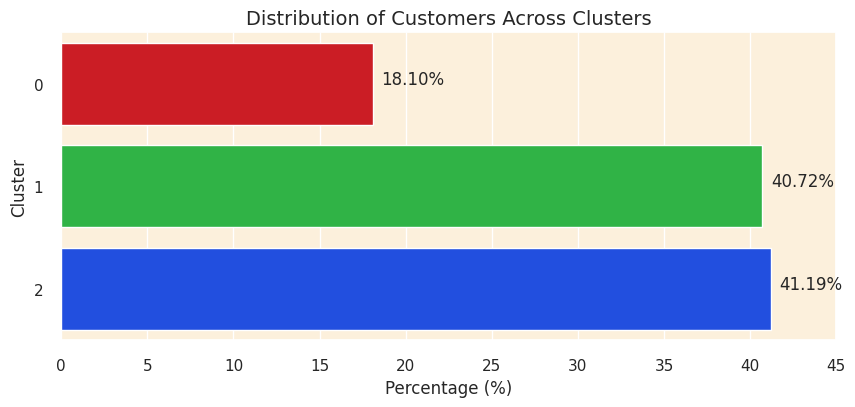

In [ ]:
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()#perc for cust per cluster
cluster_percentage.columns = ['Cluster', 'Percentage'] #renaming columns
cluster_percentage.sort_values(by='Cluster', inplace=True)

plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

for index, value in enumerate(cluster_percentage['Percentage']):#adds percentages at the end of each bar
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

plt.show()

In [ ]:
num_observations = len(customer_data_pca)

X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |        4067         |
|    Silhouette Score     | 0.23622848017098874 |
| Calinski Harabasz Score | 1257.1747766540636  |
|  Davies Bouldin Score   | 1.3682695376074665  |
+-------------------------+---------------------+


**Cluster Analysis**

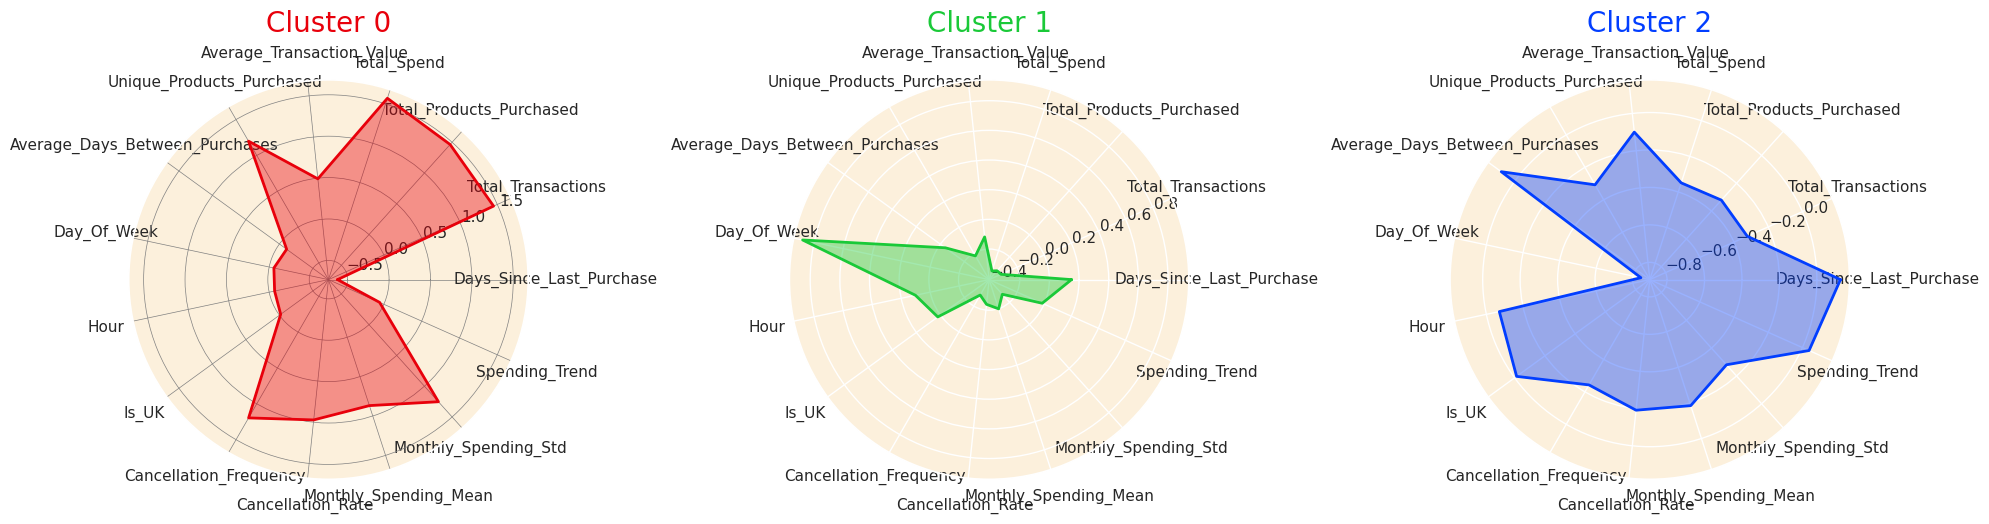

In [ ]:
df_customer = customer_data_cleaned.set_index('CustomerID')

scaler = StandardScaler()#standardizing numerical features
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster', 'Segment'], axis=1))

df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-2], index=df_customer.index) # Aadding bcak features
df_customer_standardized['cluster'] = df_customer['cluster']
df_customer_standardized['Segment'] = df_customer['Segment']

cluster_centroids = df_customer_standardized.drop(columns=['Segment']).groupby('cluster').mean()# calac mean value of each feature for each cluster

def create_radar_chart(ax, angles, data, color, cluster): #setting up for radar chart

    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')


    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

labels=np.array(cluster_centroids.columns)#setting axis
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)#plotting radar chart for each cluster

for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]
    create_radar_chart(ax[i], angles, data, color, i)

ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

ax[0].grid(color='grey', linewidth=0.5)

plt.tight_layout()
plt.show()

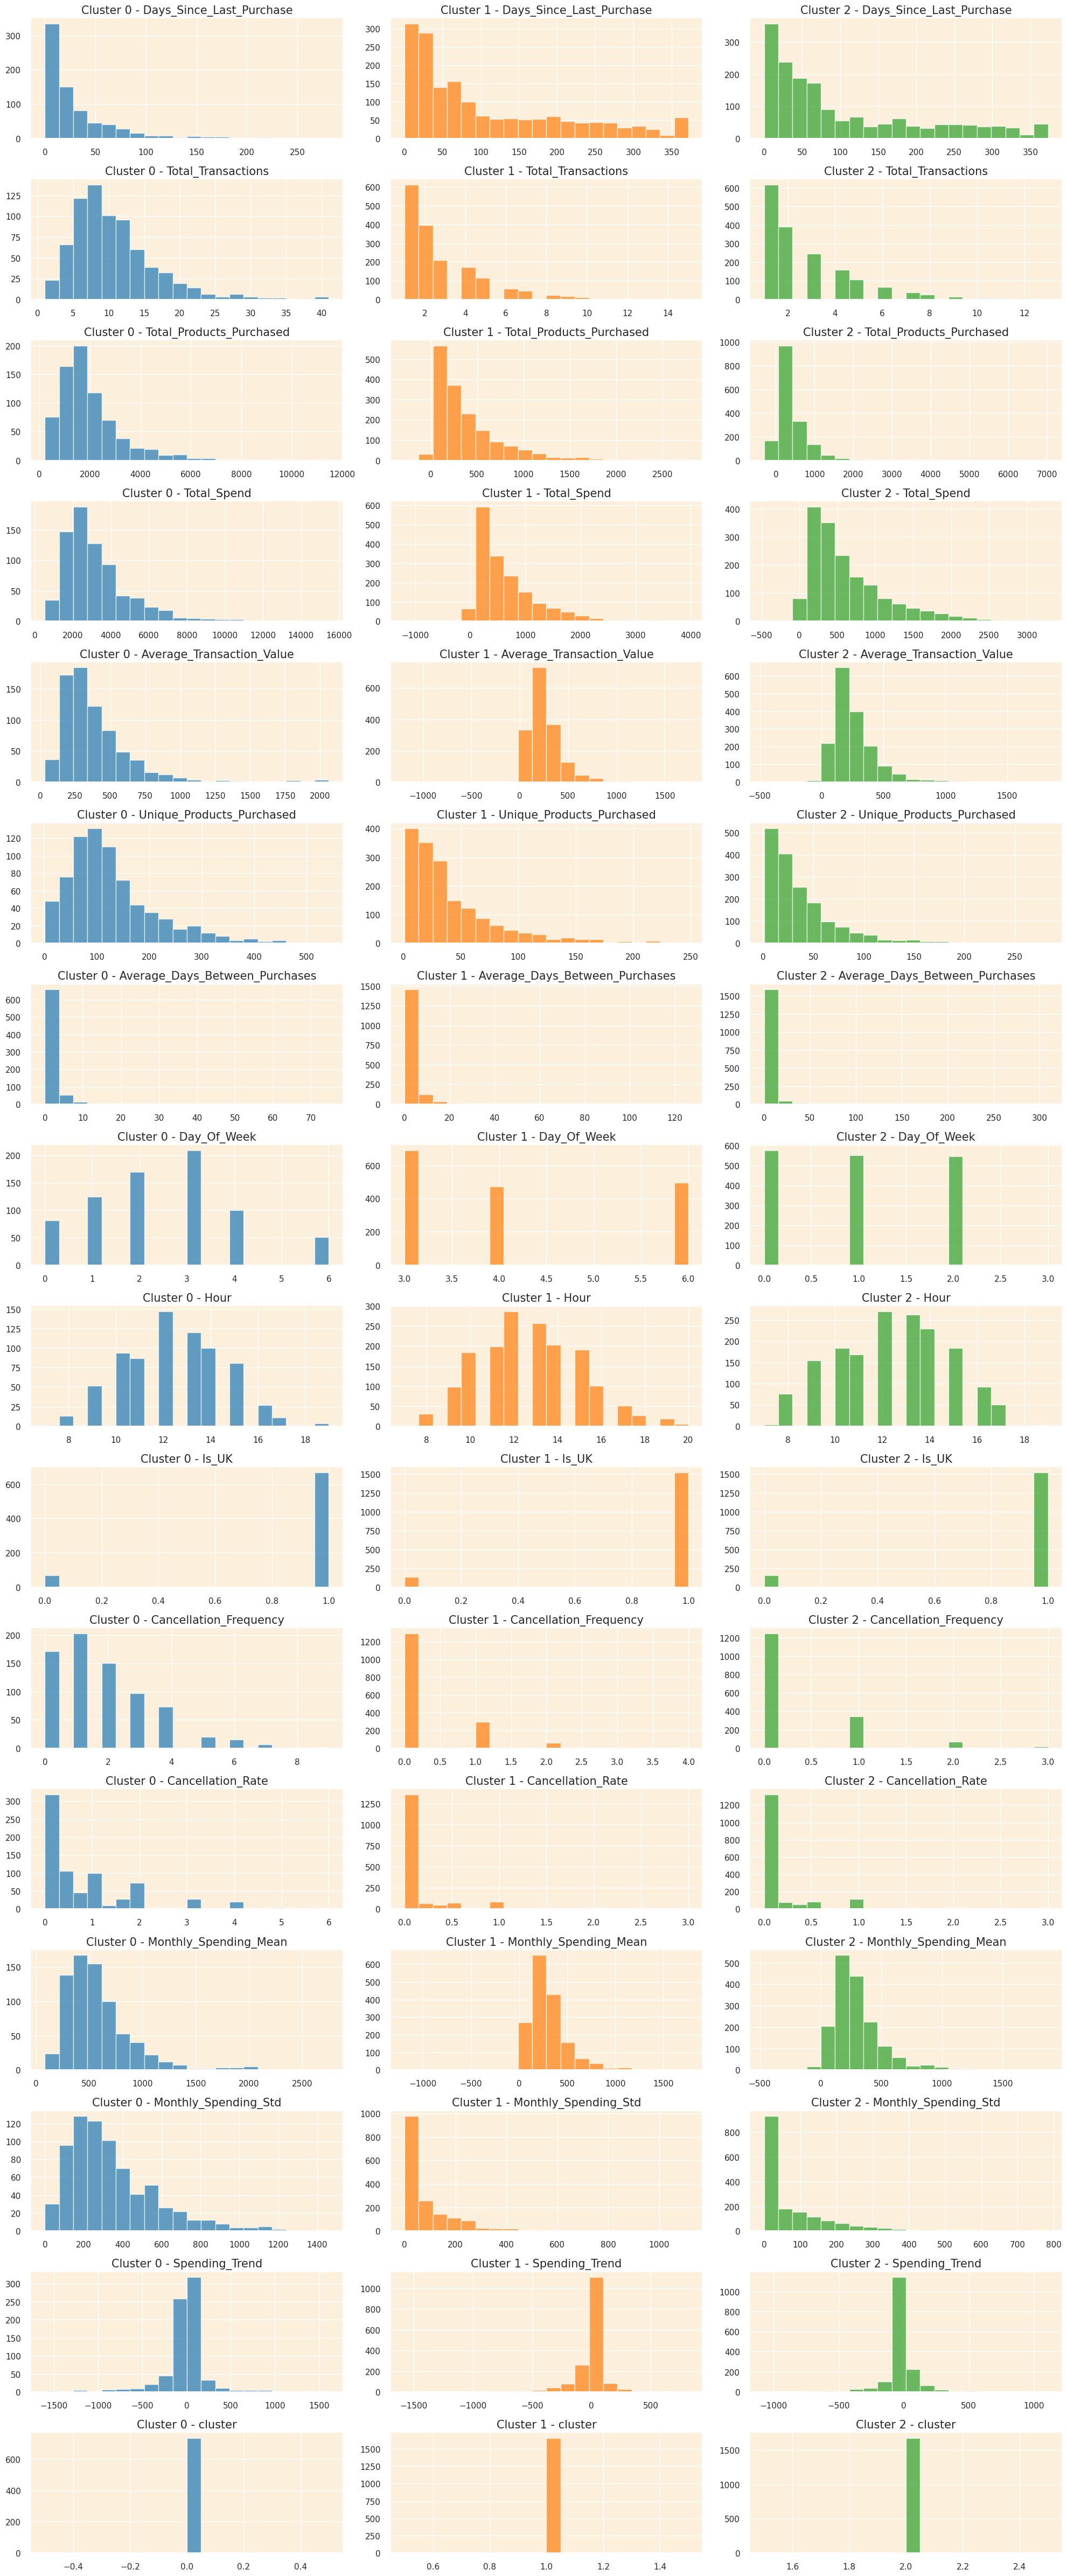

In [ ]:
import matplotlib.pyplot as plt

colors = plt.cm.tab10.colors

features = customer_data_cleaned.columns[1:-1]#excluding first and last feature
clusters = customer_data_cleaned['cluster'].unique()#sorting unique clusteirng id
clusters.sort()

n_rows = len(features)#creating grid
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

for i, feature in enumerate(features):#preparing clean array values to pass
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]

        data = data.to_numpy().flatten()


        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)

        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')


plt.tight_layout()
plt.show()

**Recommendation System**

In [ ]:
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']

    for customer in customers_in_cluster:

        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) &
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()

        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)


        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())


recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [ ]:
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
13243.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
13232.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
14997.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14948.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
12596.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
16686.0,22616,PACK OF 12 LONDON TISSUES,85099B,JUMBO BAG RED RETROSPOT,84879,ASSORTED COLOUR BIRD ORNAMENT
17101.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14954.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
18123.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
